# STAT 301 Group Project - Individual Planning Stage

While this is a group project, it is important to note that this assignment is intended to be completed individually. Every student needs to write and submit their own assignment. Our aim is to ensure that all students in the group are well-prepared and able to contribute effectively to the final report.

### 1. Data Description

Provide a full description of the dataset chosen. Note that the selected dataset will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. Regardless of which variables you plan to use, provide a full descriptive summary of the dataset, including information such as the number of observations, number of variables, name and type of variables, etc. You may want to use a table or bullet points to describe the variables in the dataset.

Include a brief description of the dataset indicating how the data has been collected or where it comes from.

In [1]:
# Attaching packages. Source: Course worksheets
library(plyr)
library(dplyr)
library(tidyverse)
library(cowplot)
library(ggplot2)
library(GGally)
library(reshape2)
library(repr)
library(infer)
library(broom)
library(AER)
library(modelr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr

In [2]:
# Reading in dataset (also referred to in Q2

employee <- read_csv("data/Employee.csv")
head(employee)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


The Employees dataset is comprised of anonymized information about employees in company, including: highest education level, work history, location, salary, demographics, and information regarding their work with the company. This data was collected by the company Human Resources department and contributed to Kaggle, a community offering data science resources and tools.

#### Overview of dataset:
- Tibble: 4653 x 9, ie. **number of variables = 9** and **sample size = 4653**
- No missing values!

In [3]:
# Check for missing values
sum(is.na(employee))

# Find where these missing values are (there are none so commented out)
# which(is.na(employee)) 

[1] 0

#### Overview of variables:
- **Education** *(categorical)*: a chr representing the highest level of education attained by the employee. Categories are **Bachelors** (n = 3601), **Masters** (n = 873), **PHD** (n = 179)

- **JoiningYear** *(numerical)*: a dbl representing the year a given employee first started working for the company. Range from **2012 to 2018** inclusive.

- **City** *(categorical)*: a chr representing the city in which an employee works for the company. **Bangalore** (n = 2228), **New Delhi** (n = 1157), **Pune** (n = 1268)

- **PaymentTier** *(categorical)*: a dbl representing a bin containing an employee's salary, using one-hot encoding. Categories are **1** (n = 243), **2** (n = 918), **3** (n = 3492)

- **Age** *(numerical)*: a dbl representing the age of employees working at a company. Ranges from **22 to 41** inclusive.

- **Gender** *(categorical)*:a chr representing the sex of employees working at a company. Categories are **Female** (n = 1875) and **Male** (n = 2778).

- **EverBenched** *(binary)*: a chr representing whether or not an employee has been benched, ie. had a period of time without work assigned to them. Categories are **No** (n = 4175) and **Yes** (n = 478).

- **ExperienceInCurrentDomain** *(numerical)*: a dbl representing the years of experience an employee has in the area of their role prior to joining the company. Ranges from **0 to 7**.

- **LeaveOrNot** *(binary)*: a dble representing whether an employee left of not. Categories are **0** (n = 3053) and **1** (n = 1600), with 0 

In [4]:
# Scaffolding code used to determine counts for each category in a categorical/binary factor.

# test_employee <- employee %>%
#     group_by(...) %>% # group_by whichever variable I am looking for (Education, City, PaymentTier, Gender, EverBenched, LeaveOrNot)
#     tally()

# Example use: Education
test_employee <- employee %>%
    group_by(Education) %>% # group_by whichever variable I am looking for (Education, City, PaymentTier, Gender, EverBenched, LeaveOrNot)
    tally()

test_employee

Education,n
<chr>,<int>
Bachelors,3601
Masters,873
PHD,179


In [5]:
# Scaffolding code used to determine range of numerical factors

# test_employee <- employee %>%
#     select(...) %>% # select whichever variable I am looking for (JoiningYear, Age, ExperienceInCurrentDomain)
#     summarize(min = min(.),
#               max = max(.))


# Example use: ExperienceInCurrentDomain
test_employee <- employee %>%
    select(ExperienceInCurrentDomain) %>% # select whichever variable I am looking for (JoiningYear, Age, ExperienceInCurrentDomain)
    summarize(min = min(.),
              max = max(.))

test_employee

min,max
<dbl>,<dbl>
0,7


### 2. Question

Clearly state the question you will try to answer using the selected dataset. Your question should involve one random variable of interest (the response) and one or more explanatory variables. Describe clearly how the data will help you address the question of interest. Explain whether your question is focused on prediction, inference, or both.

It is fine to have the same question as other group members. However, you don’t need to agree on a unique common question for the group project. In fact, usually many questions can be answered with the same dataset. Regardless of how many questions are proposed within each group, each team member must state and justify at least one question of interest.

#### Our Question:
Our project has two goals:
- Explore the relationship of Education, PaymentTier, EverBenched, Age, City, and ExperienceInCurrentDomain on employee retention (LeaveOrNot)
- After determining which of the above predictors are associated with LeaveOrNot, train a predictive model to determine an employee's odds of leaving the company.

As such, our question is **what is the relationship of Education, PaymentTier, Age, EverBenched, City, ExperienceInCurrentDomain with each other and employee retention (LeaveOrNot), and can these predictors be used to predict the odds of an employee leaving the company?**

To accomplish these goals, our question **involves both inference and prediction**. In order to select a model, we'd analyze the relation of the 5 predictors with our response, LeaveOrNot, as well as their relationships with each other to determine the presence of interaction (inference). Once our inference is complete, we would train a model using these predictors to predict an employee's odds of leaving using a testing set.

Our data supports this goal by providing information on all of these predictors, however, will need to transform the data by dropping variables do not wish to use and pre-processing cetrain data types to ease analysis.

**We've selected these predictors** as we felt that they were relevant to an employee deciding whether or not to leave a company:
- **Education, ExperienceinCurrentDomain, and Age** provide information on an employee's prior qualification prior to starting to work at the company. This would allow for a greater glimpse into the employee's work history - for example, an employee with Age = 23, a Bachelors and ExperienceinCurrentDomain = 0 leaves the company. It may be possible employee is starting out in an entry level position and is leaving the company to pursue a higher position.

- **PaymentTier** is relevant as people need money to survive. If an employee has high pay, they may be more likely to stay at the company and vice-versa.

- **EverBenched** is relevant as if employees went prolonged periods without access to work or other meaningful tasks, they may develop a negative perception of their experience with the company (ex. I came here to learn a skill, but have not been given anything to do. Maybe I should look into employment elsewhere).

- **City** would allow for more generalization as the model could account for specific municipal or location-based factors. For example, an employee working in Bangalore might have less living costs compared to an employee working in New Delhi. It may be possible that a PaymentTier 3 sufficient to live in Bangalore but not New Delhi.

**We chose to drop the following predictors**:
- **Gender**: We elected to not include Gender for two reasons. The first is that this isn't inclusive as when the data was collected, Gender was presented as a binary option when in practice, many people identify as genders beyond the binary. This also may introduce a response bias, as participants who identify as a non-binary gender would be required to incorrectly list their gender identity without an option to not disclose this information. Secondly, this may skew information due to differing societal expectations of men and women in the workplace. We do in fact live in a patriarchal society where women starting families are pressured to bear the majority of childcare responsibilities which may impact whether a female employee chooses to leave the company. "The patriarchy creates outliers in the data" - one of my research supervisors.
    

- **JoiningYear**: We elected to exclude this as we felt that it wouldn't be able to provide much context without other information that we did not have access to. For example, if we wanted to use JoiningYear to determine how long an employee has worked at the company, we would be unable to do so without access to a data was published and information on when an employee left the company (if applicable).

### 3. Exploratory Data Analysis and Visualization

In this assignment, you will:
- Demonstrate that the dataset can be loaded into R.
- Clean and wrangle your data into a tidy format.
- Propose a visualization that you consider relevant to address your question or to explore the data.
    - propose a high-quality plot or set of plots of the same kind (e.g., histograms of different variables)
    - explain why you consider this plot relevant to address your question or to explore the data

Note: this visualization does not have to illustrate the results of a methodology. Instead, you are exploring which variables are relevant, potential problems that you anticipate encountering, groups in the observations, etc.

#### Making a Heatmap!

One visualization that would support the goals of our project is a **heatmap**! This would allow us to evaluate the correlation of all our predictors with response and each other. We would then use the results of our heatmap to guide whether we include or exclude a predictor in our analysis. 

Prior to making a heatmap, we would need to perform the following data wrangling:
- Exclude predictors we aren't considering
- Apply ordinal encoding to Education (1 = Bachelors, 2 = Masters, 3 = PHD)
- Apply one-hot encoding to City
- Apply binary encoding to EverBenched (0 = No, 1 = Yes)

In [21]:
# Wrangling data to exclude predictors we aren't considering
employee_dropped <- employee %>%
    select(-Gender, -JoiningYear)

head(employee_dropped)

Education,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Bachelors,Bangalore,3,34,No,0,0
Bachelors,Pune,1,28,No,3,1
Bachelors,New Delhi,3,38,No,2,0
Masters,Bangalore,3,27,No,5,1
Masters,Pune,3,24,Yes,2,1
Bachelors,Bangalore,3,22,No,0,0


In [22]:
# Converting character strings into numeric factors
employee_processed <- employee_dropped %>%
    mutate(Education = as.numeric(factor(employee_dropped$Education)),
           City = as.numeric(factor(employee_dropped$City)),
          EverBenched = as.numeric(factor(employee_dropped$EverBenched)) - 1) 
# could not get it to start at 0 for no and 1 for yes (default was 1 and 2). Not elegant but it works :/

head(employee_processed)

Education,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3,34,0,0,0
1,3,1,28,0,3,1
1,2,3,38,0,2,0
2,1,3,27,0,5,1
2,3,3,24,1,2,1
1,1,3,22,0,0,0


In [23]:
corr_matrix_employees <- 
   employee_processed %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

head(corr_matrix_employees)

var1,var2,corr
<chr>,<chr>,<dbl>
Education,Education,1.000000000
Education,City,0.149903439
Education,PaymentTier,-0.140741037
Education,Age,-0.010611066
Education,EverBenched,-0.052248638
Education,ExperienceInCurrentDomain,-0.004462647


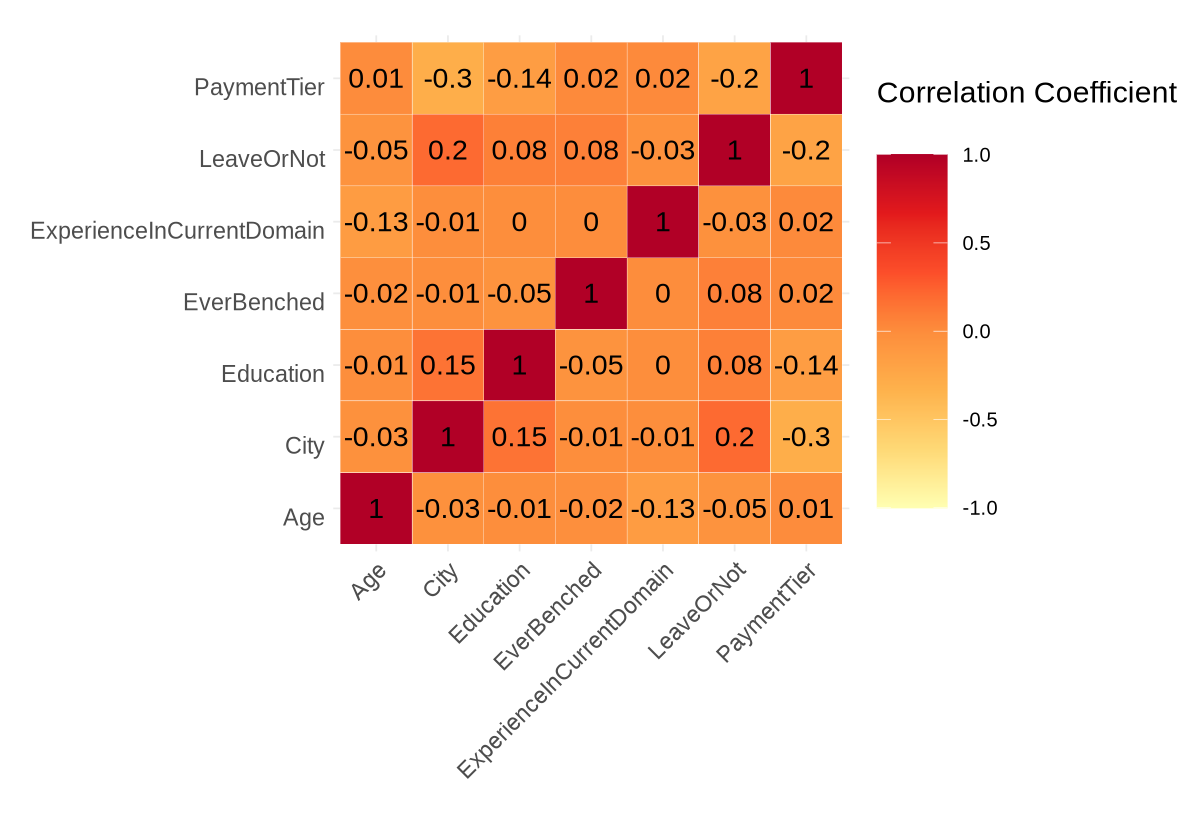

In [24]:
options(repr.plot.width = 10, repr.plot.height = 7) 

employee_processed_plot <- 
  corr_matrix_employees %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() + geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

employee_processed_plot

#### Interpreting the Heatmap:

Based on the results of our heatmap, none of our predictors are highly correlated with each other (corr ranges from -0.14 to 0.15). This suggests that our predictors don't interact with each other very much. This suggests that an additive model would be appropriate given the lack of interaction between predictors. 

Additionally, our predictors (when considered individually) aren't very correlated with our response, LeaveOrNot (corr ranges from -0.05 to 0.2). It may be possible that when considered together, we would be able to develop a more reliable model so we shouldn't immediately drop a predictor.

### 4. Methods and Plan

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. You do not need to run the model and present results at this stage. Just a high-level thinking of what model you are planning to use. 

In your explanation, respond to the following questions:
- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?

#### Our Methods

One possible plan to address the goals of our two-part question is:
- Use a heatmap to look for correlation between predictors and individual predictors with the response. 

- Based on results of heatmap, consider dropping predictors that aren't correlated with other predictors and response.

- Split our dataset into 0.7 training and 0.3 testing splits.

- Fit a logistic regression with the predictors we have using our training set. 

- Perform backward selection to find the model with the best fit. Retrain a logistic regression based on our findings.

- Test our model against the unseen data and evaluate it for accuracy.

#### Why this methodology

Using a heatmap would allow us to analyze the relationship between predictors and between predictors and the response by looking at correlation. This would allow us to evaluate for collinearity and interaction (helps with fitting the model), and will provide guidance on which variables we could consider dropping when fitting our model.

Based on the results we have obtained, we should **keep all of the predictors in our model and use an additive logistic regression**. This is because none of the predictors are strongly correlated with each other, nor are they strongly individually correlated with our response (LeaveOrNot). It may be possible that when considered together, they will be able to accurately predict the odds of an employee leaving. This fulfills our first goal of looking at the relationships of Education, PaymentTier, Age, EverBenched, City, ExperienceInCurrentDomain with each other and employee retention (LeaveOrNot)?

We then split our dataset into a 0.7-0.3 training-testing split as per standard. We decided to do a logistic regression as it would be the best way of predicting the odds of a binary event occurring (an employee leaving the company). We've elected to do a backward selection vs. a forward selection since we will be starting from the largest number of predictors possible since none of them are individually strongly correlated with each other or the response. Based on these results, we would then retrain a logistic regression excluding specific predictors or continue onward as is. Lastly, testing the model's accuracy is important as this would determine if our model would be usable, thus answering our question of whether Education, PaymentTier, Age, EverBenched, City, and ExperienceInCurrentDomain can be used to predict the odds of an employee leaving the company

#### Assumptions of our model

Our additive logistic regression assumes:
- No multicollinearity

- Linear relationship with the logit

- Binary response variable

- Independent observations

Our response variable is binary as the events of an employee leaving vs not leaving are mutally exclusive. We also evaluated our predictors for multicollinearity, as there is very little correlation between predictors, we feel comfortable with this assumption. We can evaluate the relationship between predictors and the logit by looking at a scatterplot, I chose to use a heatmap since it answers our other question while debunking a different assumption. We are also assuming these observations are independent. This might not be the case as a well-liked employee leaving may lead to others leaving (weakness).

The key limitations are application to locations outside those we included as we would have to retrain the model on data from those cities. We also cannot guarantee the independence of our observations so we are unsure if we meet all the assumptions of the logistic regression.